<a href="https://colab.research.google.com/github/4graf/Data_Processing/blob/main/ML/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D0%BF%D0%BE%D0%B4%D0%BA%D1%80%D0%B5%D0%BF%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
a = 12.123
np.round(a, 2)

12.12

In [ ]:
gamma = list(np.arange(0, 1, 0.001))

b = [1*g+3*g**2 for g in gamma]
a = [1*g+1*g**2+1*g**3+2*g**4 for g in gamma]
print([gamma[i] for i in range(len(gamma)) if np.round(a[i], 3)==np.round(b[i], 3)])

[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.011, 0.012, 0.781]


# Q-LEARNING

In [ ]:
!pip install --upgrade gym==0.18.0
import gym
import numpy as np
import time
from IPython.display import clear_output

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.3 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.18.0-py3-none-any.whl size=1656446 sha256=111ab757625ffbf2356dcbe6f5e09743c85cd2fd89bc34cf732ceed99e29d297
  Stored in directory: /root/.cache/pip/wheels/d8/e7/68/a3f0f1b5831c9321d7523f6fd4e0d3f83f2705a1cbd5daaa79
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.0
    Uninstalling cloudpickle-2.2.0:
      Successfully uninstalled cloudpickle-2.2.0
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [ ]:
eps = 0.05
gamma = 0.9
random_seed = 2

In [ ]:
time_delay = 0.1 # Задержка времени при отрисовке процесса игры после обучения (секунды)
lr_rate = 0.9 #Коэффициент скорости обучения альфа

In [ ]:
def generate_random_map(size, p, sd):
    """Generates a random valid map (one that has a path from start to goal)
    :param size: size of each side of the grid
    :param p: probability that a tile is frozen
    """
    valid = False
    np.random.seed(sd)

    # DFS to check that it's a valid path.
    def is_valid(res):
        frontier, discovered = [], set()
        frontier.append((0,0))
        while frontier:
            r, c = frontier.pop()
            if not (r,c) in discovered:
                discovered.add((r,c))
                directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
                for x, y in directions:
                    r_new = r + x
                    c_new = c + y
                    if r_new < 0 or r_new >= size or c_new < 0 or c_new >= size:
                        continue
                    if res[r_new][c_new] == 'G':
                        return True
                    if (res[r_new][c_new] not in '#H'):
                        frontier.append((r_new, c_new))
        return False

    while not valid:
        p = min(1, p)
        res = np.random.choice(['F', 'H'], (size, size), p=[p, 1-p])
        res[0][0] = 'S'
        res[-1][-1] = 'G'
        valid = is_valid(res)
    return ["".join(x) for x in res]

# F - твёрдый лёд; H - проталина; G - цель
random_map = generate_random_map(size=6, p=0.8, sd = random_seed) #Создаем свою карту
maze = random_map #Переменная maze служит для отрисовки маршрута агента
env = gym.make("FrozenLake-v0", desc=random_map, is_slippery=False) #Инициализируем среду
print("Ваша карта")
env.render() #Выводим карту на экран

Ваша карта

SFFFFF
FFFFFF
FFFFHF
HFFFFF
FFFFFF
FFFFFG


In [ ]:
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < eps:
        action = np.random.randint(0,env.action_space.n) #***
    else:
        action = np.random.choice(np.array(np.argwhere(Q[state, :] == np.amax(Q[state, :])).flatten().tolist()))
    return action

def learn(state, state2, reward, action, done):
    #Q-learning
    if done:
      Q[state, action] = Q[state, action] + lr_rate * (reward - Q[state, action])
    else:
      Q[state, action] = Q[state, action] + lr_rate * (reward + gamma * np.max(Q[state2, :]) - Q[state, action])

In [ ]:
from tqdm import tqdm
# Inititalization
wins_arr = [] #delete
np.random.seed(random_seed)
total_episodes = 10000
max_steps = 100
Q = np.zeros((env.observation_space.n, env.action_space.n))
min_episode = 0 #delete
#Main cycle
for episode in tqdm(range(total_episodes)):
    state = env.reset()
    t = 0
    while t < max_steps:
      #delete
        if episode > 5 and wins_arr[episode-5] == 1 and wins_arr[episode-4] == 1 and wins_arr[episode-3] == 1 and wins_arr[episode-2] == 1 and wins_arr[episode-1] == 1 and min_episode ==0:
          min_episode = episode
        
        t += 1

        action = choose_action(state)

        state2, reward, done, info = env.step(action)

        if t == max_steps:
          done = True  

        learn(state, state2, reward, action, done)

        state = state2


        if done and reward == 1:
          wins_arr.append(1) #record if won
          break
        if done:
          wins_arr.append(0) #record if lost
          break


100%|██████████| 10000/10000 [00:07<00:00, 1292.45it/s]


In [ ]:
#print("Таблица ценностей действий")
#print(np.round(Q,4))
#Number of wins
print("Количество побед в серии из 10 000 игр: ", np.sum(wins_arr))
#Number of the episode
print("Пять побед подряд впервые было одержано в игре ",min_episode)
#print("Q-table")
#print(np.round(Q,2))
#print("Number of wins: ", #your code here)
#print("Number of the episode", #your code here)


Количество побед в серии из 10 000 игр:  9824
Пять побед подряд впервые было одержано в игре  81


In [ ]:
import time
#Жадный выбор действий
def choose_action_one_game(state):
    action = np.random.choice(np.array(np.argwhere(Q[state, :] == np.amax(Q[state, :])).flatten().tolist()))
    return action
#Массив для сохранения состояний агента в течение игры
states=[]
t = 0
state = env.reset()
wn = 0
while(t<100):
  env.render()
  time.sleep(time_delay)
  clear_output(wait=True)
  action = choose_action_one_game(state)  
  state2, reward, done, info = env.step(action)  
  states.append(state)
  state = state2
  t += 1
  if done and reward == 1:
    wn=1
  if done:
    break
if wn == 1:
  print("!!!Победа!!!")

!!!Победа!!!


In [ ]:
v1 = p_a*((p_a_s*(r+g*v1p)) + ) + 

v1 = 0.2*(0.1*(2+0.8*v2) + 0.9*(3+0.8*v3)) + 0.8*(5+0.8*v3)
v2 = 3 + 0.8*v1
v3 = 0.1*(-3 + 0.8*v1) + 0.9*(0.2*(1+0.8*v3) + 0.8*(6+0.8*v4))
v4 = 0.6*(5+0.8*v1) + 0.4*(-3+0.8*v2)

v1 = (0.088 + 0.9*(3+0.8*v3)) + 0.8*(5+0.8*v3)) / 0.872
v2 = 
v3 = 0.1*(-3 + 0.8*(v1)) + 0.9*(0.2*(1+0.8*v3) + 0.8*(6+0.8*(0.6*(5+0.8*v1) + 0.4*(-3+0.8*(3 + 0.8*v1)))))
v3 = -0.3 + 0.08*v1 + 0.9*(0.2+0.16*v3 + 0.8()) 
                                                
0.1*(-3 + 0.8*(v1)) + 0.9*(0.2*(1+0.8*v3) + 6.58944 + 0.47104*v1)
-0.3 + 0.08*v1 + 0.9 * (6.78944 + 0.16*v3 + 0.47104*v1)
-0.3 + 0.08*v1  + 6.110496  + 0.144*v3 + 0.423936*v1
v3 - 0.144*v3 = 5.810496 + 0.503936*v1 
0.856*v3 = 6.78796261682243 + 0.503936*((0.088 + 0.9*(3+0.8*v3)) + 0.8*(5+0.8*v3)) / 0.872) / 0.856
                                         0.088 + 2.7 + 0.72*v3 + 4 + 0.64*v3
                                         6.788 + 1.36*v3
                                         7.7844 + 1.559633*v3
                            4.58267 + 0.91815*v3
v3 = 11.3706326 + 0.91815*v3
v3 = 138.92207
v3 = 
v4 = 

In [ ]:
11.3706326 / 0.081849

138.9220711309851

In [ ]:
v3 = 138.9220711309851
v1 = ((0.088 + 0.9*(3+0.8*v3)) + 0.8*(5+0.8*v3)) / 0.872
v2 = 3 + 0.8*v1
v4 = 0.6*(5+0.8*v1) + 0.4*(-3+0.8*v2)
v1

224.45185405749973

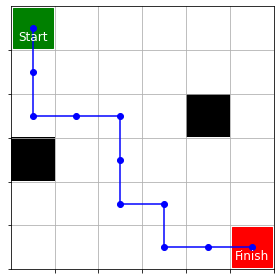

In [ ]:
import matplotlib.pyplot as plt

def make_maze_pic(maze):
  maze_pic=[]
  for i in range(len(maze)):
    row = []
    for j in range(len(maze[i])):
      if maze[i][j] == 'S':
        row.append(0)
      if maze[i][j] == 'F':
        row.append(0)
      if maze[i][j] == 'H':
        row.append(1)
      if maze[i][j] == 'G':
        row.append(0)
    maze_pic.append(row)
  maze_pic = np.array(maze_pic)
  return maze_pic
  

#Make maze fit to plot
maze_pic = make_maze_pic(random_map)
nrows, ncols = maze_pic.shape

#Arrays of picture elements
rw = np.remainder(states,nrows)
cl = np.floor_divide(states,nrows)
if wn == 1:
  rw = np.append(rw, [nrows-1])
  cl = np.append(cl,[ncols-1])

#Picture plotting
fig, ax1 = plt.subplots(1, 1, tight_layout=True)
ax1.clear()
ax1.set_xticks(np.arange(0.5, nrows, step=1))
ax1.set_xticklabels([])
ax1.set_yticks(np.arange(0.5, ncols, step=1))
ax1.set_yticklabels([])
ax1.grid(True)
ax1.plot([0],[0], "gs", markersize=40)  # start is a big green square
ax1.text(0, 0.2,"Start", ha="center", va="center", color="white", fontsize=12) #Start text
ax1.plot([nrows-1],[ncols-1], "rs", markersize=40)  # exit is a big red square
ax1.text(nrows-1, ncols-1+0.2,"Finish", ha="center", va="center", color="white", fontsize=12) #Exit text
ax1.plot(rw,cl, ls = '-', color = 'blue') #Blue lines path
ax1.plot(rw,cl, "bo")  # Blue dots visited cells
ax1.imshow(maze_pic, cmap="binary")